1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```
5. Vypište za pomoci funkce print() datové typy jednotlivých sloupců.

In [1]:
# Buňka pro body 1-5
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
print(df.dtypes)

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
YEAR                int32
MONTH               int32
dtype: object


6. Filtrujte ```df``` na YEAR >= 2015 a uložte do proměnné ```df_filtrovano```.
7. Upravte ```df_filtrovano```, aby obsahoval sloupce ```DATE```, ```YEAR``` a ```MONTH```, ```PRCP``` 
8. Do proměnné ```df_info``` uložte informaci o počtu řádků a sloupců v ```df_filtrovano```.
9. Vypište prvních 5 řádků ```df_filtrovano```.

In [7]:
# Buňka pro body 6-9	¨
df_filtrovano = df.loc[df['YEAR']>=2015]
df_filtrovano = df_filtrovano[['DATE','YEAR','MONTH','PRCP']]
df_info = df_filtrovano.shape
print(df_filtrovano.head())

           DATE  YEAR  MONTH  PRCP
2953 2015-01-01  2015      1   0.0
2954 2015-01-02  2015      1   5.7
2955 2015-01-03  2015      1  43.7
2956 2015-01-04  2015      1   1.8
2957 2015-01-05  2015      1   0.0


10. Do proměnné ```df_agregovano``` agregujte data z ```df_filtrovano``` dle sloupce ```YEAR``` a spočítejte sumu hodnot sloupce ```PRCP```.
11. Seřaďte ```df_agregovano``` vzestupně dle sloupce ```YEAR```.
12. Identifikujte, který rok měl nejvíce srážek a kolik to bylo.
13. Identifikujte, který rok měl nejméně srážek a kolik to bylo.
14. Hodnoty z bodů 12 a 13 vypište za pomoci funkce print()

In [16]:
# Buňka pro body 10-14

df_agregovano = df_filtrovano.groupby(by='YEAR')['PRCP'].sum()
df_agregovano = df_agregovano.sort_index(ascending=True)

# varianta 1
max_srazky = df_agregovano.max()
min_srazky = df_agregovano.min()
df_agregovano_rok_max_srazky = df_agregovano.loc[df_agregovano == max_srazky].index.values
df_agregovano_rok_min_srazky = df_agregovano.loc[df_agregovano == min_srazky].index.values
print(f'maximalni srazky: {max_srazky}')
print(f'rok s nejvetsim mnozstvim srazek: {df_agregovano_rok_max_srazky}')
print(f'minimalni srazky: {min_srazky}')
print(f'rok s nejmensim mnozstvim srazek: {df_agregovano_rok_min_srazky}')


# # varianta 2
# df_agregovano = df_agregovano.reset_index()
# max_srazky = df_agregovano['PRCP'].max()
# min_srazky = df_agregovano['PRCP'].min()
# df_agregovano_rok_max_srazky = df_agregovano.loc[df_agregovano['PRCP'] == max_srazky]['YEAR'].values
# df_agregovano_rok_min_srazky = df_agregovano.loc[df_agregovano['PRCP'] == min_srazky]['YEAR'].values
# print(f'maximalni srazky: {max_srazky}')
# print(f'rok s nejvetsim mnozstvim srazek: {df_agregovano_rok_max_srazky}')
# print(f'minimalni srazky: {min_srazky}')
# print(f'rok s nejmensim mnozstvim srazek: {df_agregovano_rok_min_srazky}')

maximalni srazky: 9849.4
rok s nejvetsim mnozstvim srazek: [2017]
minimalni srazky: 4919.2
rok s nejmensim mnozstvim srazek: [2018]


15. Do sloupcového grafu vizualizujte data z ```df_agregovano```
16. Vytvořte pivot tabulku z proměnné ```df``` s indexem ```YEAR```, sloupcem ```NAME```  hodnotou ```PRCP``` a funkcí ```sum```. Uložte do proměnné ```df_pivot```.




MONTH      1       2      3      4       5       6       7       8       9   \
YEAR                                                                          
2000    258.8   242.4  552.7  165.4   497.7   403.8   673.3   427.3   388.2   
2001    316.7   220.5  514.6  595.3   325.8   580.7   711.6   398.5   724.3   
2002    128.5   324.6  365.5  339.3   515.3   774.6   730.8  1335.9   623.6   
2003    304.6    67.8   89.6  238.0   650.1   427.8   697.9   421.1   407.6   
2004    420.5   302.9  451.0  256.2   557.3  1112.6   610.3   483.2   437.5   
2005    249.5   405.6  178.7  440.4   642.0   540.9   987.6  1022.3   442.8   
2006    250.6   256.2  410.0  554.9   792.5   705.4   351.0  1142.6   305.9   
2007    397.5   368.5  466.8   65.5   866.2   838.9   775.5   819.4  1233.3   
2008    279.9   107.9  544.8  581.6   525.1   982.0  1087.4   837.7   432.0   
2009    261.7   428.6  726.4  174.3   842.3  1429.3  1176.4   750.1   470.4   
2010    398.8   241.8  218.9  587.6  1281.2  1029.0  1152.9  1227.4   730.6   
2011    311.8    79.8  330.9  259.8   821.3   920.8  1034.8   541.2   389.8   
2012    568.9   146.3  156.3  375.6   691.0   973.2   965.2   633.6   604.8   
2013    515.3   427.3  315.1  276.8  1268.3  1305.2   254.0   743.0   766.3   
2014    232.9   187.7  259.7  421.0  1330.9   444.4  1158.0  1134.3  1038.2   
2015    437.7   135.6  360.5  211.5   908.3   645.7   475.9   577.1   514.4   
2016    462.7   590.8  361.6  411.5   966.9  1271.0  1038.6   917.9   564.4   
2017   1973.2  1167.9  425.7  791.2   552.9   800.7  1037.9   842.0  1014.7   
2018    599.9   172.8  308.5  207.3   405.9   860.7   457.9   399.7   525.5   
2019   1038.9   712.3  265.7  253.7   946.2   478.7   494.3   593.9   548.5   
2020    868.5   453.1  272.7  129.3   589.7  1156.0   569.1  1040.0   696.7   

MONTH     10     11     12  
YEAR                        
2000   448.6  400.9  340.8  
2001   149.0  332.5  323.4  
2002   595.7  519.1  454.4  
2003   528.2  217.9  246.9  
2004   372.2  443.9  148.5  
2005    73.6  218.5  439.5  
2006   230.7  214.4  201.0  
2007   393.5  462.5  392.3  
2008   396.1  367.8  434.5  
2009   524.0  492.7  467.0  
2010   265.2  434.3  397.7  
2011   503.6    3.1  365.2  
2012   588.3  320.6  401.6  
2013   383.6  504.6   66.4  
2014   623.4  252.8  309.8  
2015   735.9  330.4  151.3  
2016   831.1  481.0  269.8  
2017   462.1  396.1  385.0  
2018   264.6  163.9  552.5  
2019   342.0  508.4  493.3  
2020   817.8   86.3    NaN

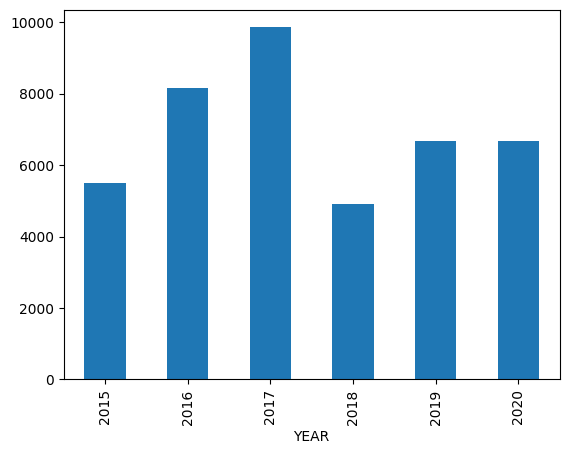

In [20]:
# Buňka pro body 15-16

df_agregovano.plot.bar(x='YEAR',y='PRCP')

df_pivot = df.pivot_table(index='YEAR',columns='MONTH',values='PRCP',aggfunc='sum')
df_pivot


17. Do proměnné df_kategorie vytvořte kopii proměnné ```df```.
18. Za pomoci metody .cut() vytvořte  do sloupce ```INTERVAL``` intervaly [-np.inf,0,5,10,np.inf] a dejte jim popisky ['neprselo','prselo malo','prselo akorat','prselo moc']
19. Agregujte ```df_kategorie``` dle sloupců ```YEAR```, ```NAME```  a ```INTERVAL``` a spočítejte počet hodnot sloupce ```DATE```.
20. Do proměnné ```df_kategorie_max``` identifikujte, ve kterém ```YEAR``` a ```NAME``` bylo nejvíce položek s hodnotou ```prselo moc```.


In [51]:
# Buňka pro body 17-20

df_kategorie = df.copy()
df_kategorie['INTERVAL'] =pd.cut(df['PRCP'],bins= [-np.inf,0,5,10,np.inf],labels =['neprselo','prselo malo','prselo akorat','prselo moc'] )
df_kategorie = df_kategorie.groupby(by=['YEAR','NAME','INTERVAL'])['DATE'].count()
# # Varianta 1
# df_kategorie = df_kategorie.loc[df_kategorie.index.get_level_values('INTERVAL') == 'prselo moc']
# df_kategorie_max = df_kategorie.max()
# df_kategorie_max_rok_name = df_kategorie.loc[df_kategorie == df_kategorie_max].index.values
# df_kategorie_max_rok_name

# Varianta 2
df_kategorie = df_kategorie.reset_index()
podminka = df_kategorie['INTERVAL'] == 'prselo moc'
df_kategorie = df_kategorie.loc[podminka]
df_kategorie_max = df_kategorie['DATE'].max()
df_kategorie_max_rok_name = df_kategorie.loc[df_kategorie['DATE'] == df_kategorie_max]
df_kategorie_max_rok_name[['YEAR','NAME']]


C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_12260\1558027056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_kategorie = df_kategorie.groupby(by=['YEAR','NAME','INTERVAL'])['DATE'].count()


YEAR      NAME
671  2016  SALZBURG